In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

# Loading Data

In [2]:
dataset_path = 'kaggle/input/seoul-bike-rental-ai-pro-iti'

# Load Data
df = pd.read_csv(os.path.join(dataset_path, 'train.csv'), encoding='utf8', index_col=0)

# Remove Diamond Character 
def rename_headers(df):
    """Function removes the special character from the 2 columns: 'Temperature' and 'Dew point temperature' """
    df.rename(columns={'Temperature(�C)':'Temperature(C)', 'Dew point temperature(�C)':'Dew point temperature(C)'}, inplace=True)

rename_headers(df)

# EDA
## Data Summary
* No null values
* Target variable is numerica l
* `object` features should be encoded
* Columns ```Holiday``` and ```Functioning Day``` should be encoded to bool.
* Date column should be converted to datetime object


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      5760 non-null   object 
 1   y                         5760 non-null   int64  
 2   Hour                      5760 non-null   int64  
 3   Temperature(C)            5760 non-null   float64
 4   Humidity(%)               5760 non-null   int64  
 5   Wind speed (m/s)          5760 non-null   float64
 6   Visibility (10m)          5760 non-null   int64  
 7   Dew point temperature(C)  5760 non-null   float64
 8   Solar Radiation (MJ/m2)   5760 non-null   float64
 9   Rainfall(mm)              5760 non-null   float64
 10  Snowfall (cm)             5760 non-null   float64
 11  Seasons                   5760 non-null   object 
 12  Holiday                   5760 non-null   object 
 13  Functioning Day           5760 non-null   object 
dtypes: float

None

# Check Catergorical columns unique values  
* `Functioning Day` and `Holiday` are imbalanced

In [5]:
print('Holiday unique values:\n', df['Holiday'].value_counts())
print('\nFunctioning day unique values:\n', df['Functioning Day'].value_counts())
print('\nSeasons unique values:\n', df['Seasons'].value_counts())

Holiday unique values:
 No Holiday    5520
Holiday        240
Name: Holiday, dtype: int64

Functioning day unique values:
 Yes    5513
No      247
Name: Functioning Day, dtype: int64

Seasons unique values:
 Spring    1440
Summer    1440
Autumn    1440
Winter    1440
Name: Seasons, dtype: int64


# Correlation between features
* `Dew point temperature(C)` and `Temperature(C)` are strongly correlated.

Feature with largest Correlation:


Temperature(C)    0.544281
Name: y, dtype: float64

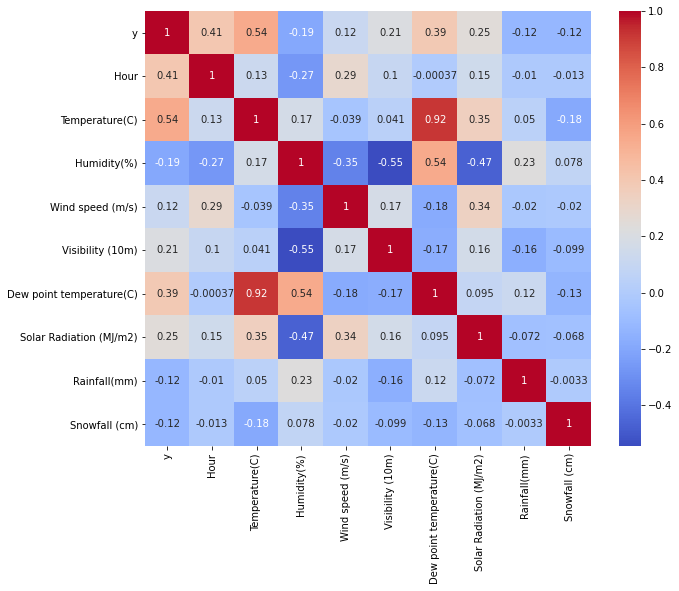

In [6]:
print("Feature with largest Correlation:")
display(df.corr().y.nlargest(2).drop('y'))

# Plotting Correlation matrix to detect multicollinearity
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Effect of Temperature and Solar Radiation
* Bike rentals are highest around `25` degree Celcius
* There is a non-linear relation ship between `Temperature(C)` and `y`.
* `Solar Radiation (MJ/m2)` has an effect and an interaction with `Temperature(C)`
* Rentals are lower when there is high radiation and high temperature at the same time. 

<AxesSubplot:xlabel='Temperature(C)', ylabel='y'>

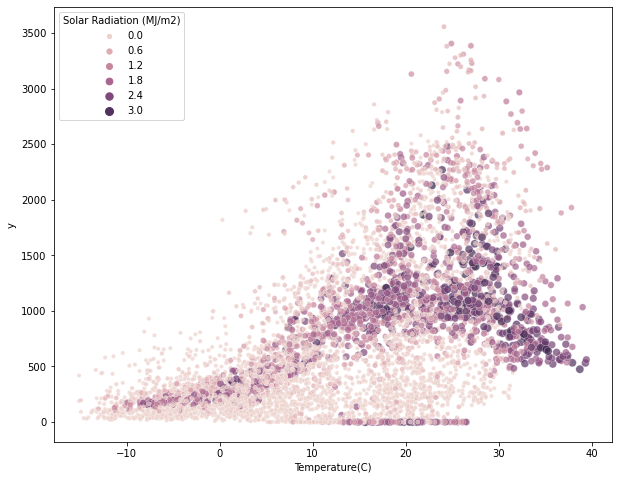

In [7]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Temperature(C)', y='y', size='Solar Radiation (MJ/m2)', hue='Solar Radiation (MJ/m2)' ,alpha=0.7, data=df)

# Effect of Humidity on Rentals
* Rentals are lower when both humidity and temperature are high at the same time. 


<AxesSubplot:xlabel='Temperature(C)', ylabel='y'>

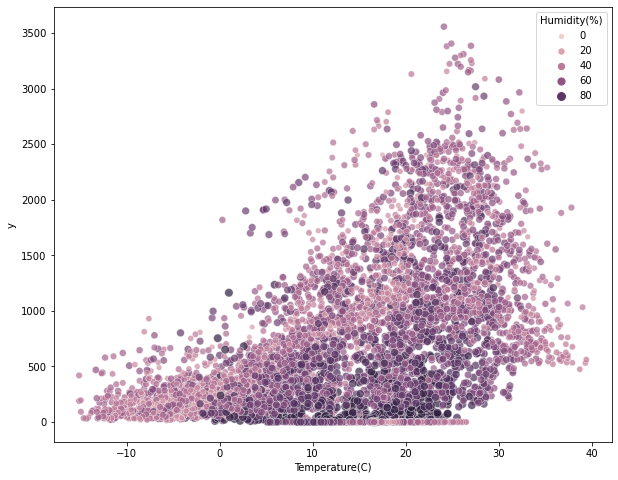

In [8]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Temperature(C)', y='y', size='Humidity(%)', hue='Humidity(%)' ,alpha=0.7, data=df)

# Effect of Seasons and Holidays
* ```Seasons``` have effect on the number of bike rentals. Rentals are higher in warmer seasons.
* ```Holiday``` has effect on the number of bike rentals. Rentals are higher in holidays

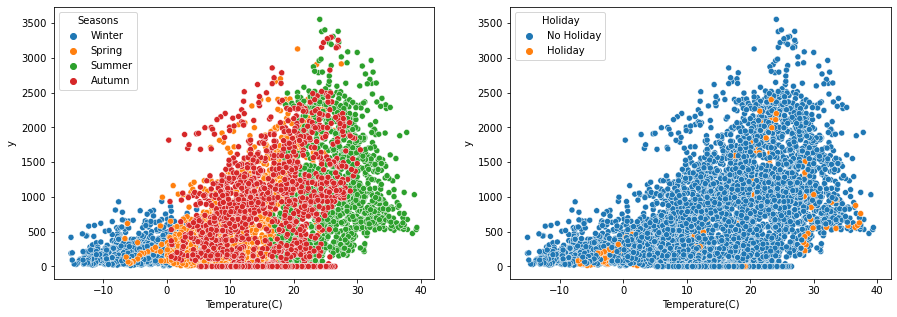

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(x='Temperature(C)', y='y',hue='Seasons', data=df,ax=ax1)
sns.scatterplot(x='Temperature(C)', y='y',hue='Holiday', data=df, ax=ax2)
plt.show()

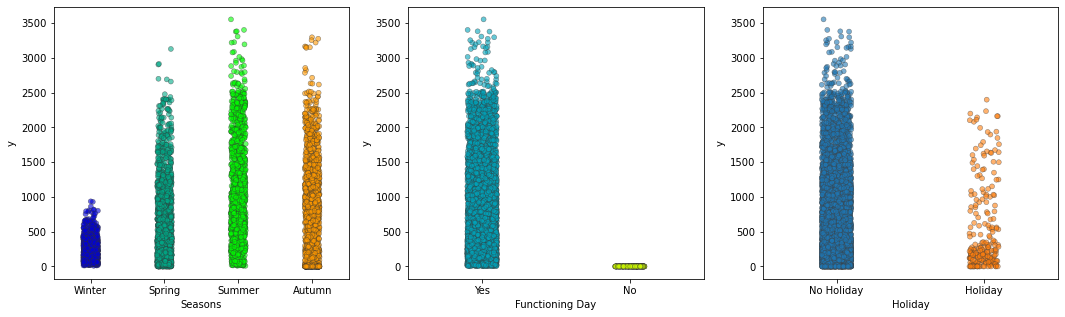

In [10]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,5))
sns.stripplot(x=df['Seasons'], y=df['y'], palette='nipy_spectral', linewidth=0.5, alpha=0.6, ax=ax1)
sns.stripplot(x=df['Functioning Day'],y=df['y'], palette='nipy_spectral', linewidth=0.5, alpha=0.6, ax=ax2)
sns.stripplot(x=df['Holiday'], y=df['y'], linewidth=0.5, alpha=0.6, ax=ax3);

## Visualizing numerical data

* The data is noisy and trends are hard to detect. Mathematical transformations for target and feature variables should be tried as it might yield a better model learning.

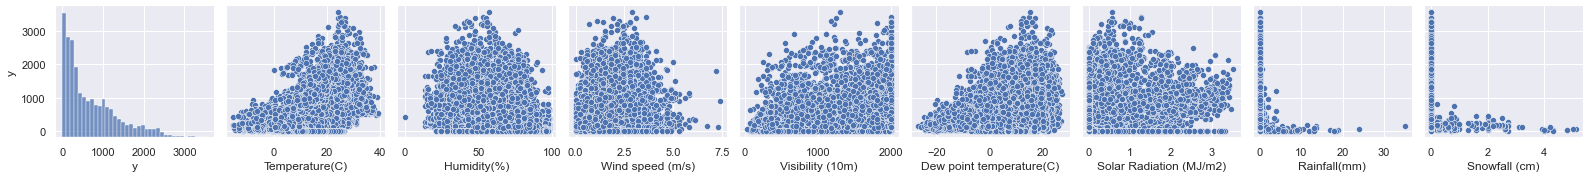

In [11]:
sns.set(rc={'figure.figsize':(15,12)})
numerical_cols = df.select_dtypes('number').drop(columns=['Hour']).columns.tolist()
g=sns.pairplot(x_vars=numerical_cols, y_vars='y', data=df, palette='Dark2')

# Predictor Transformation
* Raising the target feature to ``0.09`` and `log` for the features below results in more clear relations.

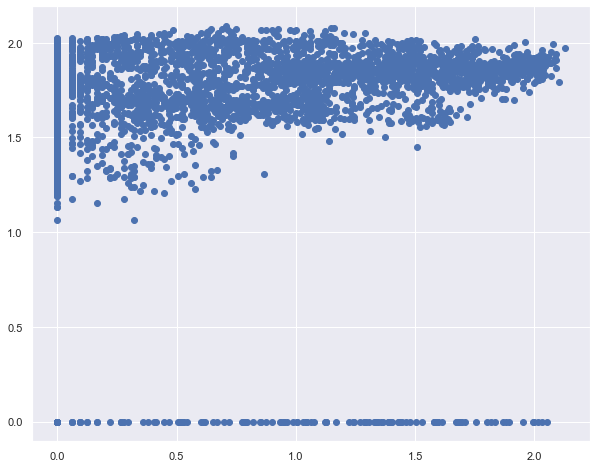

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter((df['Solar Radiation (MJ/m2)'])**0.6, df.y ** 0.09)
plt.show()

D:\ProgramData\Miniconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


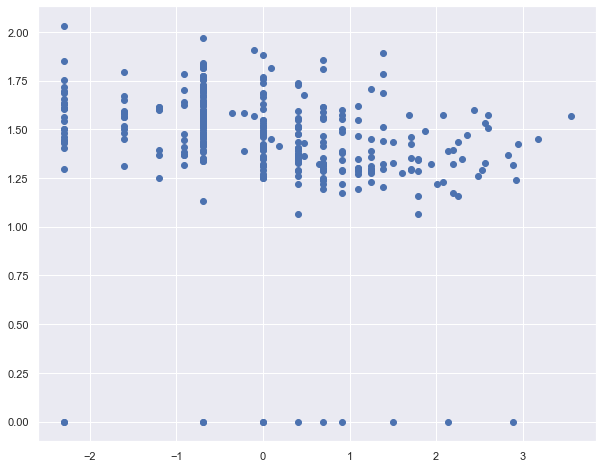

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(np.log(df['Rainfall(mm)']), df.y ** 0.09)
plt.show()

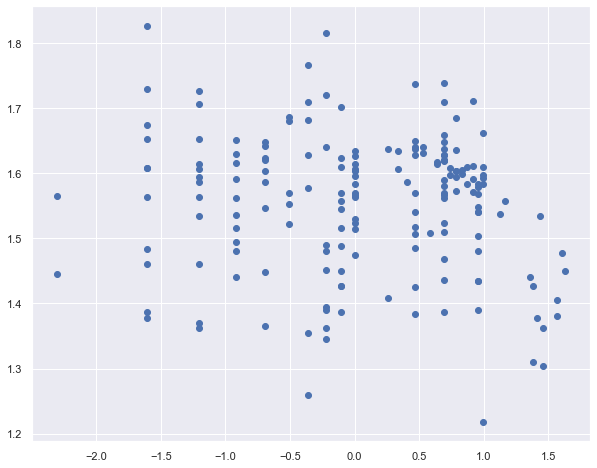

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(np.log(df['Snowfall (cm)']), df.y ** 0.09)
plt.show()

# How bike rentals have changed over time

The train dataset holds data for the first 20 days of each month. With this incomplete data, it's better to observe the change in the number of rentals with respect to time, on a monthly basis for the two years.

The plot shows the following:
1. Bike rentals have increased over the two years
2. Rate of Bike rentals increases in warmer months
3. Bike rentals peak during the morning and afternoon periods of the day 

<Figure size 720x576 with 0 Axes>

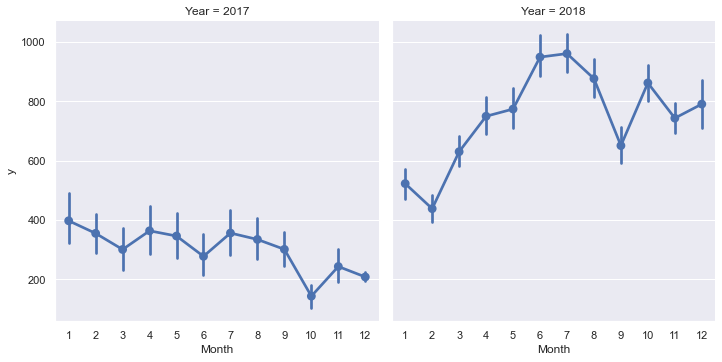

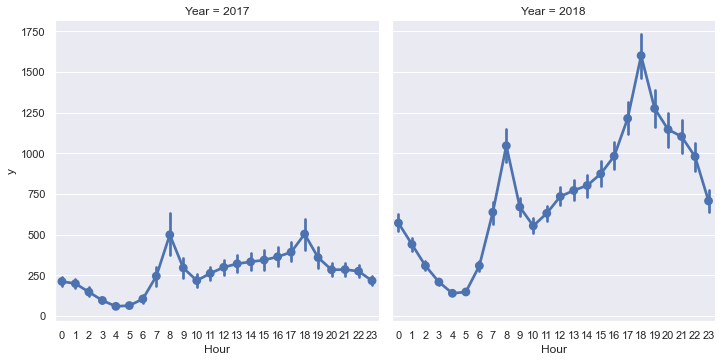

In [15]:
plt.figure(figsize=(10, 8))
dates_df = df.loc[:, ['y', 'Date', 'Hour']]
dates_df['Date'] = pd.to_datetime(df['Date'])
dates_df['Year'] = dates_df['Date'].dt.year
dates_df['Month'] = dates_df['Date'].dt.month
sns.catplot(data=dates_df, x='Month', y='y', col='Year', kind='point')
sns.catplot(data=dates_df, x='Hour', y='y', col='Year', kind='point')

plt.show()

# Distribution of Date time features
* Train Data doesn't provide target values for all days
* Data for the year 2017 is much less than for 2018

<AxesSubplot:xlabel='Hour', ylabel='count'>

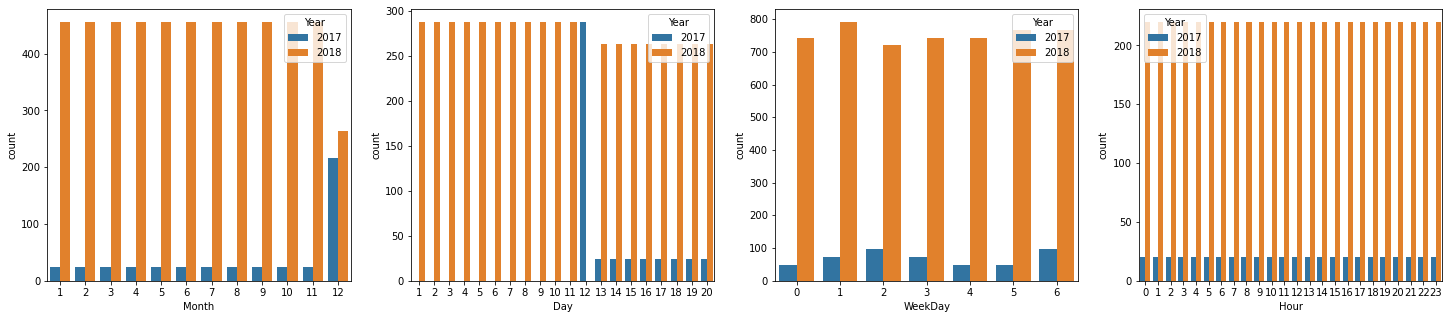

In [41]:
df['Date'] = pd.to_datetime(df['Date'])
df['WeekDay'] = df['Date'].dt.weekday
df['Day'] = df.Date.dt.day
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year.astype('category')

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(25, 5))
sns.countplot(x='Month', data=df, hue='Year', ax=axs[0])
sns.countplot(x='Day', data=df, hue='Year', ax=axs[1])
sns.countplot(x='WeekDay', data=df, hue='Year', ax=axs[2])
sns.countplot(x='Hour', data=df, hue='Year', ax=axs[3])

# How many hours does the dataset provide target values?
* Data for 11 hours for each day is provided in the train data fro both years. 

In [60]:
for year in [2017, 2018]:
    print("Number of hours covered in the year {} is {} of {}".format(
        year, df[df.Year == 2018].groupby(['Day']).y.count().sum(), 20 * 24 * 11)
        )

Number of hours covered in the year 2017 is 5280 of 5280
Number of hours covered in the year 2018 is 5280 of 5280


# Autocorrelation between Dates
* Lag 1 seems to be highly correlated with lag 0

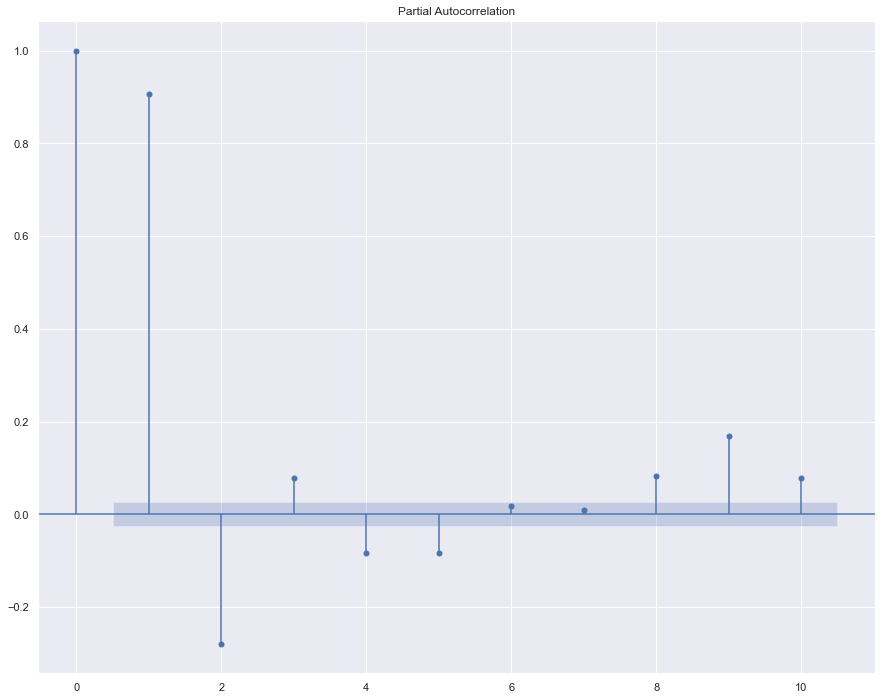

<Figure size 360x288 with 0 Axes>

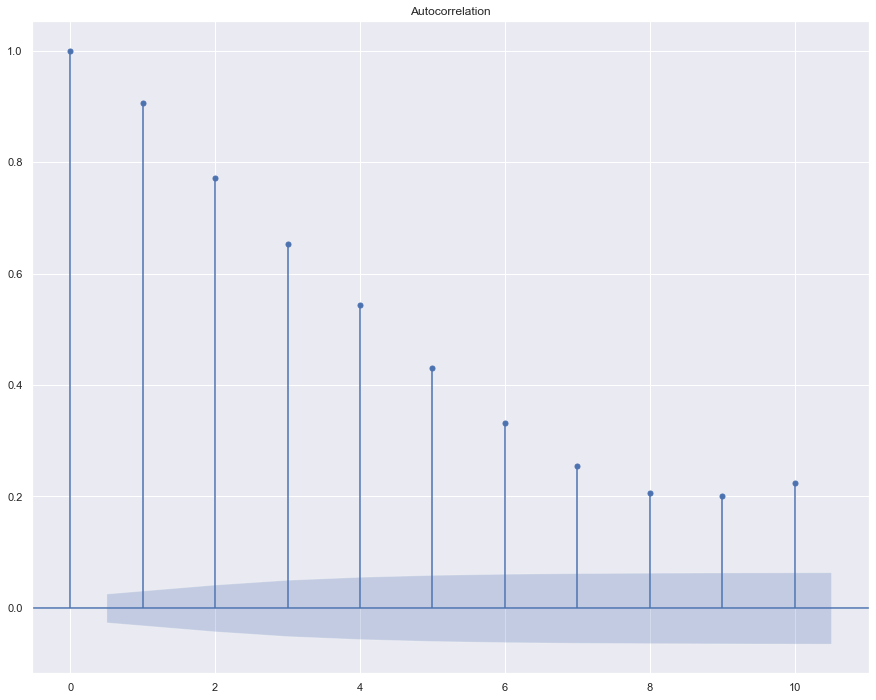

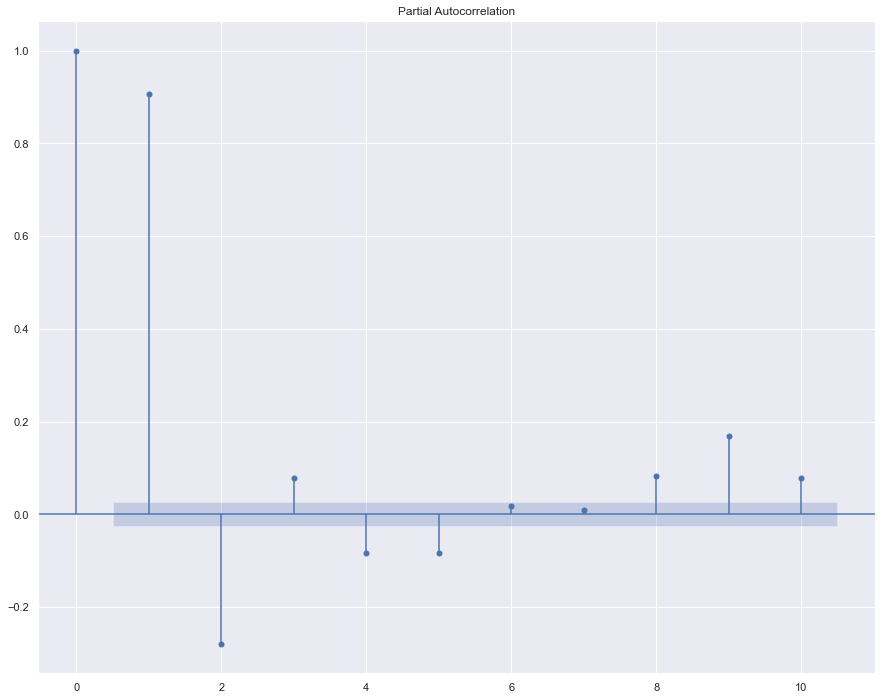

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['y'], lags=10)
plot_pacf(df['y'], lags=10)

In [45]:
# # Visualize relations of categorical variables with target variable `y`
# plt.rcParams["figure.figsize"] = (20, 6)
# sns.set_context('notebook')
# fig, axs = plt.subplots(1, 3)

# # func_day_xtable = df[['y', 'Functioning Day']].groupby('Functioning Day').agg({'y':'sum'})
# # func_day_xtable.sort_values(by='y', inplace=True, ascending=False)
# # axs[0].bar(func_day_xtable.index, func_day_xtable['y'])
# sns.barplot(x='Functioning Day', y='y', data=df, palette='husl', ax=axs[0])

# seasons_xtable = df[['y', 'Seasons']].groupby('Seasons').agg({'y':'sum'})
# seasons_xtable.sort_values(by='y', inplace=True, ascending=False)
# sns.barplot(x=seasons_xtable.index, y=seasons_xtable.y, palette='husl', ax=axs[1])

# holidays_xtable = df[['y', 'Holiday']].groupby('Holiday').agg({'y':'sum'})
# holidays_xtable.sort_values(by='y', inplace=True, ascending=False)
# sns.barplot(x=holidays_xtable.index, y=holidays_xtable.y, palette='husl', ax=axs[2])

# fig.suptitle('Number of rentals', fontsize=16)
# plt.show()

In [ ]:
# numerical_df = df.select_dtypes('number')
# numerical_df.drop(columns=['Hour'], inplace=True)

# fig, axs = plt.subplots(1, len(numerical_df.columns) - 1, figsize=(3 * len(numerical_df.columns) - 1, 2.5), sharey=True)

# for i, col_name in enumerate(numerical_df.columns.difference(['y'])):
#     sns.scatterplot(data=numerical_df, x=col_name, y="y", ax=axs[i])
# plt.show()